# PyUCX-AI Multi-Agent Framework - Interactive Notebook

This notebook provides an interactive interface for running the PyUCX-AI framework to analyze Python files and plan Unity Catalog migrations.

## Overview
The framework uses multiple AI agents to:
- **Analyze** Python files and UCX lint issues
- **Plan** Unity Catalog migration strategies
- **Modify** code for compatibility
- **Validate** migration plans
- **Generate** Unity Catalog compatible code
- **Report** comprehensive migration analysis


## 1. Setup and Imports


In [18]:
# Import required libraries
import sys
import os
import logging
import json
from pathlib import Path
from typing import List, Dict, Any, Optional
from datetime import datetime

# Add the src directory to Python path
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

# Import framework components
try:
    from src.utils.logging_setup import quick_setup
    from src.utils.config_manager import ConfigManager
    from src.core.langgraph_framework import (
        PyUCXFramework, 
        load_notebooks_from_folder,
        load_python_files_from_folder, 
        load_lint_data_from_file,
        save_results_to_file
    )
    print("✅ Successfully imported PyUCX-AI framework components")
except ImportError as e:
    print(f"❌ Error importing framework components: {e}")
    print("Please ensure you're running this notebook from the project root directory")


✅ Successfully imported PyUCX-AI framework components


## 2. Configuration Setup


In [19]:
# Configuration parameters - You can modify these as needed
CONFIG = {
    "input_folder": "data/sample_python_files",
    "lint_file": "data/lint_outputs/sample_python_scenarios.txt",
    "output_file": "migration_analysis_results_notebook.json",
    "log_level": "INFO",
    "log_file": None,  # Set to a filename if you want to log to file
    "max_iterations": 200,
    "thread_id": "notebook-session",
    "config_file": None,  # Path to custom config file if needed
    "verbose": True
}

print("📋 Configuration:")
for key, value in CONFIG.items():
    print(f"  {key}: {value}")


📋 Configuration:
  input_folder: data/sample_python_files
  lint_file: data/lint_outputs/sample_python_scenarios.txt
  output_file: migration_analysis_results_notebook.json
  log_level: INFO
  log_file: None
  max_iterations: 200
  thread_id: notebook-session
  config_file: None
  verbose: True


## 3. Validation and Helper Functions


In [20]:
def validate_inputs(config: Dict[str, Any]) -> bool:
    """Validate input parameters and files."""
    
    errors = []

    # Check input folder
    input_folder = Path(config["input_folder"])
    if not input_folder.exists():
        errors.append(f"Input folder does not exist: {config['input_folder']}")
    elif not input_folder.is_dir():
        errors.append(f"Input path is not a directory: {config['input_folder']}")
    else:
        # Check for Python files
        python_files = list(input_folder.glob("*.py"))
        if not python_files:
            errors.append(f"No Python files found in: {config['input_folder']}")

    # Check lint file
    lint_file = Path(config["lint_file"])
    if not lint_file.exists():
        errors.append(f"Lint file does not exist: {config['lint_file']}")
    elif not lint_file.is_file():
        errors.append(f"Lint path is not a file: {config['lint_file']}")

    if errors:
        print("❌ Validation Errors:")
        for error in errors:
            print(f"  - {error}")
        return False

    print("✅ Input validation passed!")
    return True


def setup_configuration(config: Dict[str, Any]) -> ConfigManager:
    """Setup configuration manager."""
    
    if config.get("config_file"):
        config_manager = ConfigManager(config_path=config["config_file"])
    else:
        config_manager = ConfigManager()

    config_manager.update({
        "log_level": config["log_level"],
        "log_file": config["log_file"],
        "max_iterations": config["max_iterations"]
    })

    return config_manager


## 4. Execute Analysis

Now let's run the complete analysis workflow. This will:


In [21]:
# Step 1: Validate inputs
print("🔍 Validating inputs...")
if not validate_inputs(CONFIG):
    raise Exception("Input validation failed")

# Step 2: Setup logging and configuration
print("📝 Setting up logging and configuration...")
log_level = "DEBUG" if CONFIG["verbose"] else CONFIG["log_level"]
logger = quick_setup(log_level=log_level, log_file=CONFIG["log_file"])
logger.info("PyUCX-AI Framework starting from Jupyter notebook...")

config_manager = setup_configuration(CONFIG)
if not config_manager.validate_config():
    raise Exception("Configuration validation failed")

print("✅ Setup completed successfully!")


2025-09-17 12:08:55 | INFO     | src.utils.logging_setup | Logging initialized - Level: DEBUG, File: None
2025-09-17 12:08:55 | INFO     | pyucx_ai | PyUCX-AI Framework starting from Jupyter notebook...
2025-09-17 12:08:55 | INFO     | src.utils.config_manager | Loaded environment variables from .env
2025-09-17 12:08:55 | INFO     | src.utils.config_manager | Configuration loaded successfully
2025-09-17 12:08:55 | DEBUG    | src.utils.config_manager | Configuration updated with 3 values
2025-09-17 12:08:55 | INFO     | src.utils.config_manager | Configuration validation passed


🔍 Validating inputs...
✅ Input validation passed!
📝 Setting up logging and configuration...
✅ Setup completed successfully!


In [22]:
# Step 3: Load data
print("📂 Loading Python files and lint data...")

notebooks = load_python_files_from_folder(CONFIG["input_folder"])
lint_data = load_lint_data_from_file(CONFIG["lint_file"])

if not notebooks:
    raise Exception(f"No Python files found in {CONFIG['input_folder']}")

# Print summary
total_lint_issues = sum(len(issues) for issues in lint_data.values())

print(f"\n🚀 PyUCX-AI Multi-Agent Framework - Analysis Summary")
print("=" * 60)
print(f"📁 Python files found: {len(notebooks)}")
print(f"⚠️  Total lint issues: {total_lint_issues}")
print(f"📄 Files with issues: {len(lint_data)}")

if notebooks:
    print("\n📋 Python files to analyze:")
    for nb in notebooks:
        code_lines = nb.get('code_line_count', 0)
        print(f"  - {nb['filename']} ({code_lines} code lines)")

print("=" * 60)


2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | Loaded Python file: sales_etl_pipeline.py
2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | Loaded Python file: analytics_dashboard.py
2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | Loaded 2 Python files from data/sample_python_files
2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | Loaded 20 lint issues from data/lint_outputs/sample_python_scenarios.txt


📂 Loading Python files and lint data...

🚀 PyUCX-AI Multi-Agent Framework - Analysis Summary
📁 Python files found: 2
⚠️  Total lint issues: 20
📄 Files with issues: 2

📋 Python files to analyze:
  - sales_etl_pipeline.py (13 code lines)
  - analytics_dashboard.py (17 code lines)


2025-09-17 12:08:55 | INFO     | src.services.schema_mapping_rag | Connected to existing collection: schema_mappings
2025-09-17 12:08:55 | INFO     | src.services.schema_mapping_rag | Collection already has 5 mappings
2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | RAG service initialized for dynamic catalog mapping
2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | Checkpointer initialized with MemorySaver (in-memory storage)
2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | Workflow compiled successfully


📊 Visualizing Multi-Agent Framework Graph...
✅ Framework initialized successfully
🎨 Generating graph visualization...


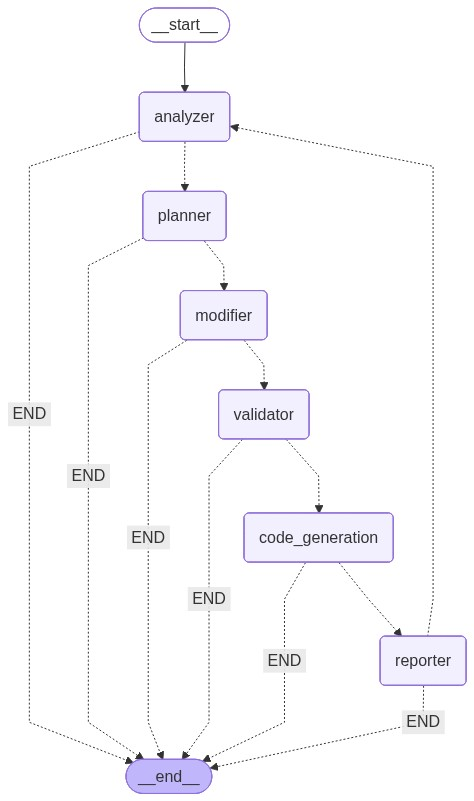

✅ Multi-agent graph visualization displayed above


In [23]:
# Step 4a: Visualize Multi-Agent Graph
print("📊 Visualizing Multi-Agent Framework Graph...")

try:
    from IPython.display import Image, display
    
    # Initialize framework
    framework = PyUCXFramework(config_manager.get_all())
    print("✅ Framework initialized successfully")
    
    # Generate and display the graph visualization
    print("🎨 Generating graph visualization...")
    graph_image = framework.workflow.get_graph().draw_mermaid_png()
    display(Image(graph_image))
    print("✅ Multi-agent graph visualization displayed above")
    
except ImportError as e:
    print(f"⚠️  Warning: Could not import visualization dependencies: {e}")
    print("    The analysis will continue without graph visualization")
    framework = PyUCXFramework(config_manager.get_all())
    
except Exception as e:
    print(f"⚠️  Warning: Could not generate graph visualization: {e}")
    print("    The analysis will continue without graph visualization")
    framework = PyUCXFramework(config_manager.get_all())

In [ ]:
# Step 4b: Execute Analysis
print("🚀 Running multi-agent analysis...")

try:
    # Run the analysis workflow
    results = framework.process_notebooks(
        notebooks=notebooks,
        lint_data=lint_data,
        thread_id=CONFIG["thread_id"]
    )
    
    print("✅ Analysis completed successfully!")
    
except Exception as e:
    print(f"❌ Error during analysis: {e}")
    logger.error(f"Analysis failed: {e}")
    
    # Create a failure results object for consistency
    results = {
        "success": False,
        "error": str(e),
        "notebooks_processed": 0,
        "total_notebooks": len(notebooks),
        "iterations_used": 0
    }


2025-09-17 12:08:55 | ERROR    | pyucx_ai | Analysis failed: 'PyUCXFramework' object has no attribute 'run_analysis'


🚀 Running multi-agent analysis...
❌ Error during analysis: 'PyUCXFramework' object has no attribute 'run_analysis'


## 5. Results and Output


In [25]:
# Step 5: Save and Display Results
print("💾 Saving results...")
try:
    save_results_to_file(results, CONFIG["output_file"])
    print(f"✅ Results saved to: {CONFIG['output_file']}")
except Exception as e:
    print(f"⚠️  Warning: Could not save results to file: {e}")

# Display results summary
success = results.get("success", False)
notebooks_processed = results.get("notebooks_processed", 0)
total_notebooks = results.get("total_notebooks", 0)

print("\n📊 Analysis Results Summary")
print("=" * 60)
status_emoji = "✅" if success else "❌"
print(f"{status_emoji} Status: {'SUCCESS' if success else 'FAILED'}")
print(f"📈 Notebooks processed: {notebooks_processed}/{total_notebooks}")

if results.get("analysis_results"):
    print(f"🔍 Analysis results: {len(results['analysis_results'])}")

if results.get("migration_plans"):
    print(f"📋 Migration plans created: {len(results['migration_plans'])}")

if results.get("code_modifications"):
    print(f"🔧 Code modifications suggested: {len(results['code_modifications'])}")

if results.get("validation_results"):
    print(f"✓ Validation checks performed: {len(results['validation_results'])}")

print(f"\n🔄 Iterations used: {results.get('iterations_used', 0)}")
print("=" * 60)

# Final status
if success:
    print("\n🎉 Analysis completed successfully!")
    print("\n📁 Check the 'output/converted_python_files/' directory for Unity Catalog compatible versions of your files.")
else:
    print("\n⚠️  Analysis completed with errors. Check the results for details.")


2025-09-17 12:08:55 | INFO     | src.core.langgraph_framework | Results saved to: migration_analysis_results_notebook.json


💾 Saving results...
✅ Results saved to: migration_analysis_results_notebook.json

📊 Analysis Results Summary
❌ Status: FAILED
📈 Notebooks processed: 0/2

🔄 Iterations used: 0

⚠️  Analysis completed with errors. Check the results for details.


## 5. View Generated Files (Optional)


In [26]:
# List generated Unity Catalog files
output_dir = Path("output/converted_python_files")
if output_dir.exists():
    generated_files = list(output_dir.glob("*.py"))
    
    if generated_files:
        print("📁 Generated Unity Catalog compatible files:")
        for file in generated_files:
            print(f"  - {file.name}")
            
        # Show sample file content
        if len(generated_files) > 0:
            sample_file = generated_files[0]
            print(f"\n📄 Sample generated file: {sample_file.name}")
            print("=" * 50)
            
            try:
                with open(sample_file, 'r') as f:
                    content = f.read()
                # Show first 20 lines
                lines = content.split('\n')[:20]
                for i, line in enumerate(lines, 1):
                    print(f"{i:2d}: {line}")
                if len(content.split('\n')) > 20:
                    print("... (truncated)")
            except Exception as e:
                print(f"Error reading file: {e}")
    else:
        print("No generated files found in output directory.")
else:
    print("Output directory does not exist.")


Output directory does not exist.


---

## 🎯 Next Steps

After running this notebook successfully:

1. **Review Results**: Check the `migration_analysis_results_notebook.json` file for detailed analysis
2. **Examine Generated Code**: Look at files in `output/converted_python_files/` directory
3. **Implement Changes**: Use the migration plans and code suggestions to update your actual codebase
4. **Validate**: Test the generated Unity Catalog compatible code in your environment

## 🔧 Customization

To customize this notebook for your specific needs:

- Modify the `CONFIG` dictionary in cell 2
- Update input folders and lint files paths
- Adjust logging levels and output formats

## 📝 Notes

- Ensure your OpenAI API key is properly configured in the `.env` file
- The analysis quality depends on the accuracy of the UCX lint data provided
- Generated code should be reviewed and tested before production use
